In [2]:
pip install auto_ts

Note: you may need to restart the kernel to use updated packages.


In [9]:

from auto_ts import auto_timeseries

In [10]:
import pandas as pd
data = pd.read_csv('/users/velkumar/Desktop/project/II major  project/data.csv', parse_dates=['Date'], index_col='Date')

In [11]:
data

,TH
Date,
2022-01-07,8375
2022-02-07,11120
2022-03-07,7855
2022-04-07,10160
2022-05-07,10520
...,...
2023-02-24,8885
2023-02-25,12715
2023-02-26,6820


In [12]:
target_col = 'TH'
time_col = 'Date'

In [13]:

model = auto_timeseries(
    score_type='rmse', forecast_period=12, time_interval='M', non_seasonal_pdq=None,
    seasonal_period=12, perform_feature_selection=True, model_with_lowest_error=True, verbose=2
)

Start of Fit.....
    Target variable given as = TH
Start of loading of data.....
    Inputs: ts_column = Date, sep = ;, target = ['TH']
    Using given input: pandas dataframe...
    train time series Date column is the index on test data...
    train data shape = (243, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


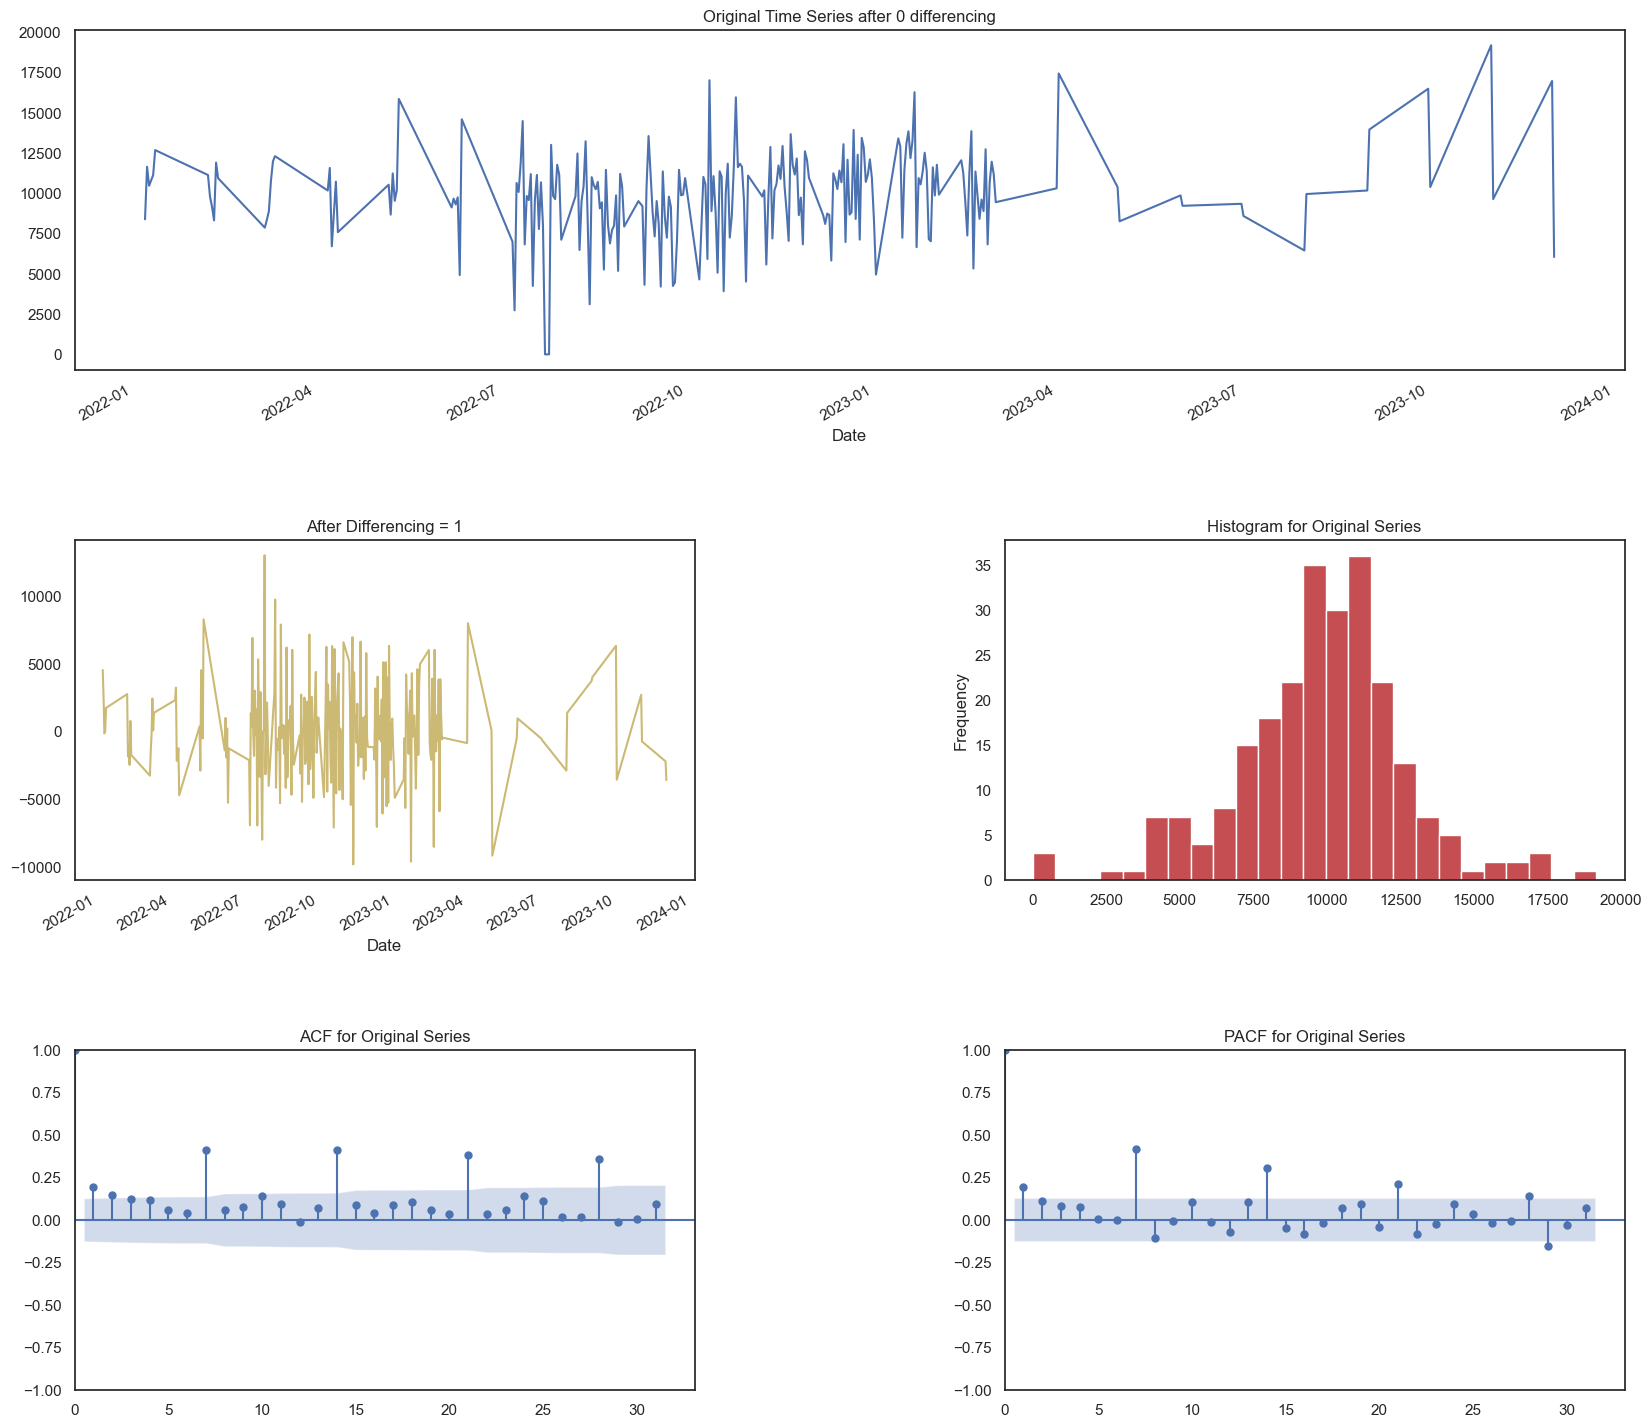

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 183 Test Shape: 12

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3500.811, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3454.147, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3498.819, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3433.972, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3428.282, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3426.345, Time=0.11 sec
 

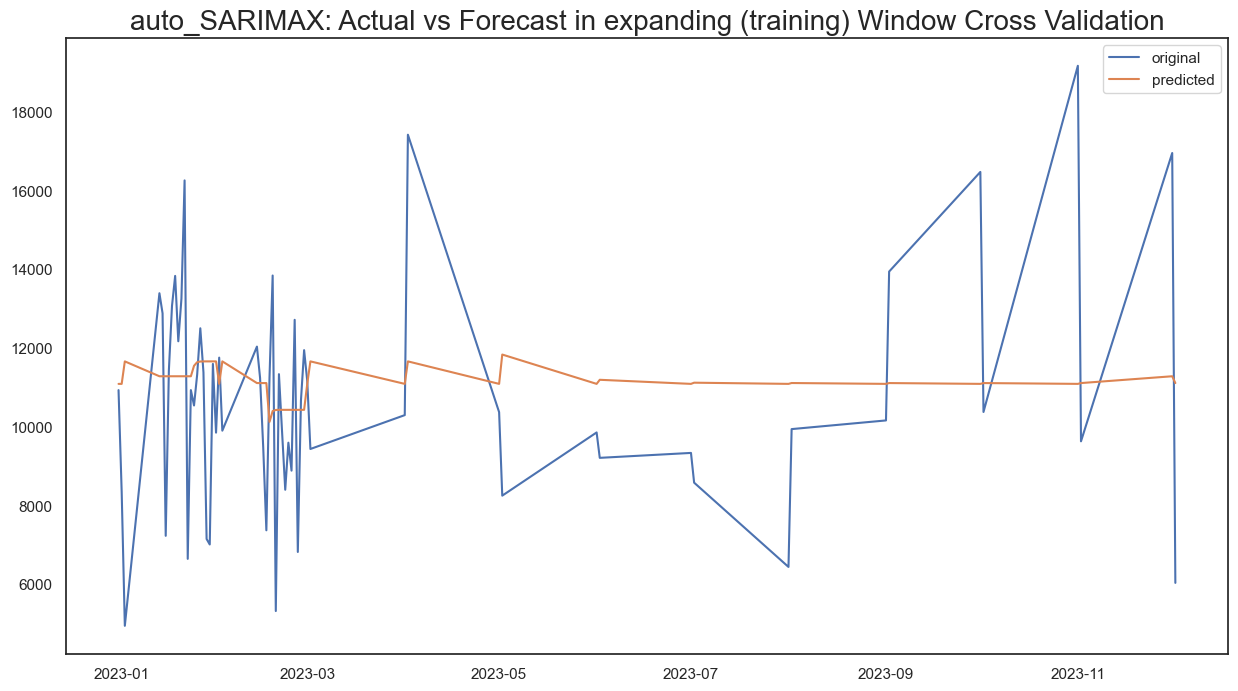

In [14]:
model.fit(
    traindata=data, 
    ts_column=time_col, 
    target=target_col, 
    cv=5, 
    sep=';'
)

In [9]:
forecast_df_folds = None

In [29]:
model = auto_timeseries(
    score_type='rmse',
    forecast_length=12,
    model_type=[ 'ml'],
    model_time_series=['XGBoost', 'Random Forest', 'LSTM'],
    verbose=2,
    lookback=3,
    time_interval='W',
    seasonal_period=4
)

Start of Fit.....
    Target variable given as = TH
Start of loading of data.....
    Inputs: ts_column = Date, sep = ;, target = ['TH']
    Using given input: pandas dataframe...
    train time series Date column is the index on test data...
    train data shape = (240, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -2.9707497269184038      |
|           p-value           |     0.037717776216177876     |
|          #Lags Used         |             6.0              |
| Number of Observations Used |            233.0             |
|     Critical Value (1%)     |      

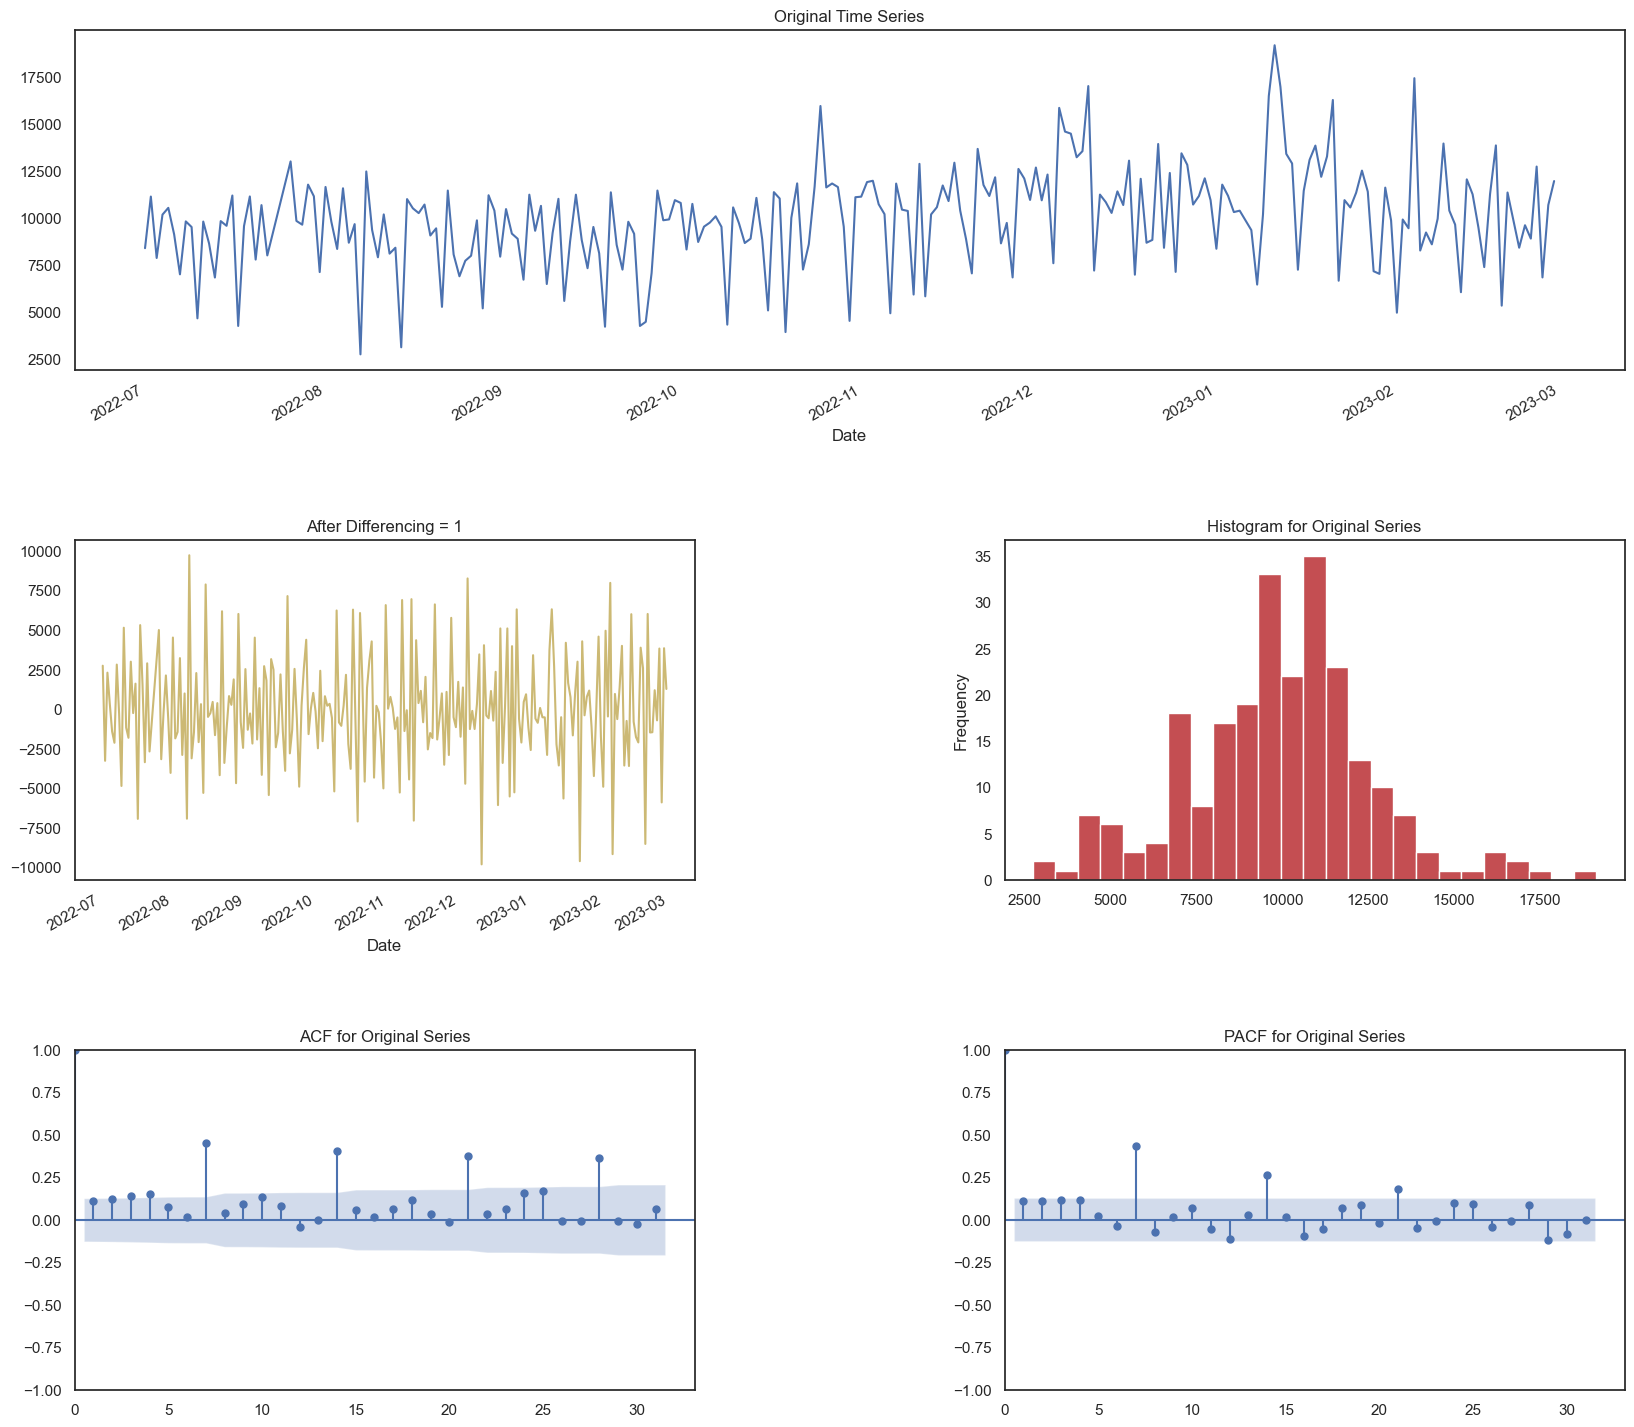

Time Interval is given as W
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####

Fitting ML model
    11 variables used in training ML model = ['TH(t-1)', 'Date_hour', 'Date_minute', 'Date_dayofweek', 'Date_quarter', 'Date_month', 'Date_year', 'Date_dayofyear', 'Date_dayofmonth', 'Date_weekofyear', 'Date_weekend']

Running Cross Validation using XGBoost model..
    Max. iterations using expanding window cross validation = 2
train fold shape (215, 11), test fold shape = (24, 11)
### Number of booster rounds = 250 for XGBoost which can be set during setup ####
    Hyper Param Tuning XGBoost with CPU parameters

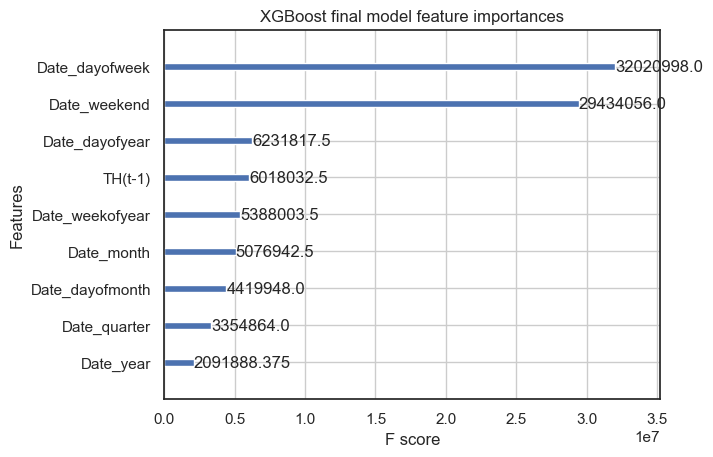

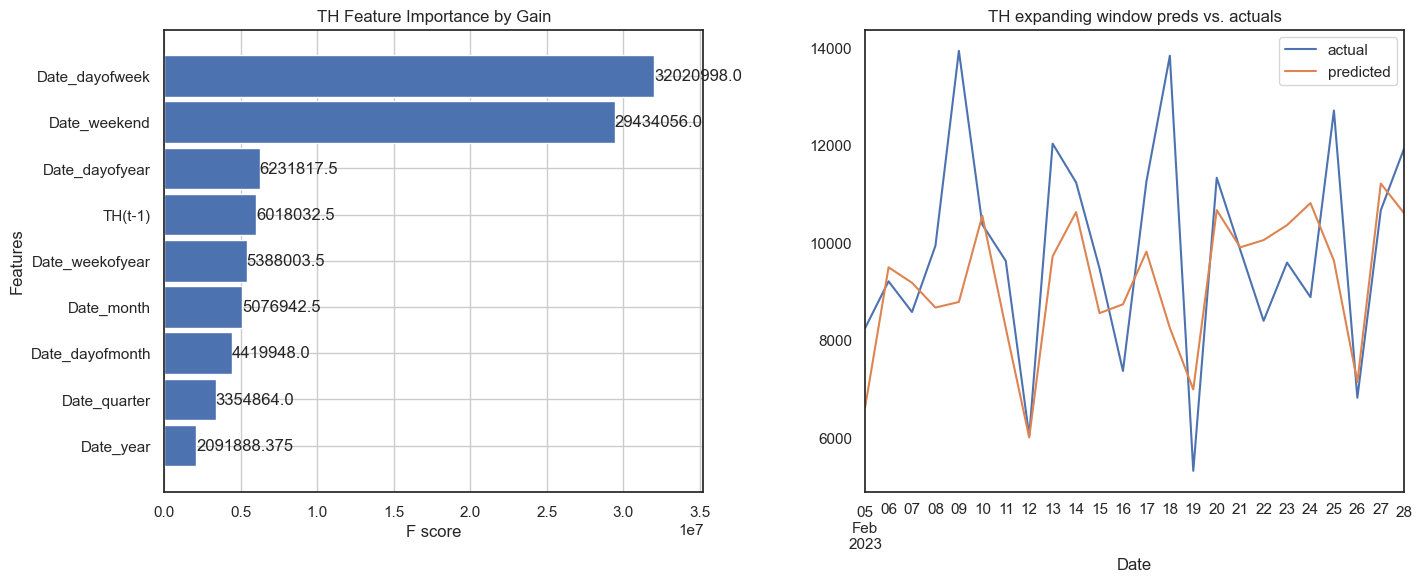

In [30]:
model.fit(
    traindata=data, 
    ts_column=time_col, 
    target=target_col, 
    cv=5, 
    sep=';'
)

In [31]:
leaderboard = model.get_leaderboard()

In [32]:
print(leaderboard)

  name        rmse
0   ML  2008.97981
